# ML Task- 1 To find out Outliers 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data loading 

In [4]:
data=pd.read_csv('house_price.csv')

In [5]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### Data Checking by using info(), describe() ###

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [6]:
print(data.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [6]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
data.nunique()

location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64

## To Check Outlies and Removal ### 

### 1. Mean Function #

In [7]:
mean=data['price_per_sqft'].mean()
mean

7920.336742424242

In [8]:
std=data['price_per_sqft'].std()
std

106727.16032810867

In [9]:
data_mean = data[(data['price_per_sqft'] > mean - 2 * std) & (data['price_per_sqft'] < mean + 2 * std)]
data_mean

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### 2. Percentile method for removing outliers

In [10]:
lowerlimit= data['price_per_sqft'].quantile(.5)
lowerlimit

5438.0

In [11]:
upperlimit= data['price_per_sqft'].quantile(0.95)
upperlimit

15312.099999999984

In [12]:
data_outliers_removed = data[(data['price_per_sqft']>lowerlimit) & (data['price_per_sqft']<upperlimit)]
data_outliers_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592
14,Sarjapur,3 Bedroom,2250.0,3.0,148.00,3,6577
15,Mysore Road,2 BHK,1175.0,2.0,73.50,2,6255
...,...,...,...,...,...,...,...
13189,Yeshwanthpur,3 BHK,1675.0,3.0,92.13,3,5500
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111


### 3. IQR method for outliers removal

In [13]:
Q1=data['price_per_sqft'].quantile(0.25)
Q1

4267.0

In [14]:
Q3=data['price_per_sqft'].quantile(0.75)
Q3

7317.0

In [15]:
IQR=Q3-Q1
IQR

3050.0

In [16]:
minimum= Q1 - 1.5 * IQR
print(minimum)
maximum = Q3+1.5*IQR
print(maximum)

-308.0
11892.0


In [17]:
data_iqr_removed = data[(data['price_per_sqft']>minimum) & (data['price_per_sqft']<maximum)]
data_iqr_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### 4. Normal Distribution using log transformation

In [18]:
data_normal_distribution = data[np.abs(data['price_per_sqft'] - data['price_per_sqft'].mean()) <= (3 * data['price_per_sqft'].std())]
data_normal_distribution

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


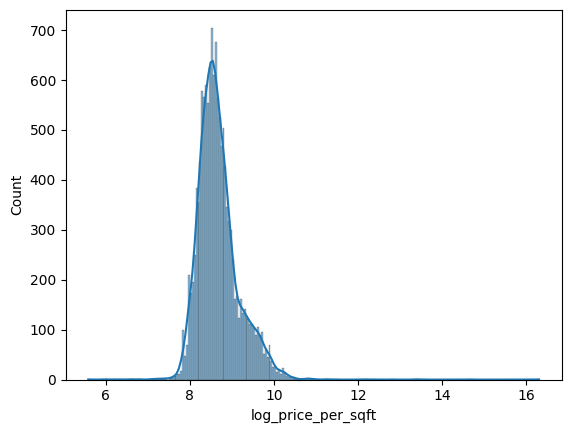

In [19]:
data['log_price_per_sqft']=np.log(data['price_per_sqft'])
sns.histplot(data['log_price_per_sqft'], kde=True)
plt.show()

### 5. Z-score Method

In [20]:
data['zscore'] = np.abs(stats.zscore(data['price_per_sqft']))
data_zscore = data[data['zscore'] < 3]
data_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.215818,0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437067,0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367532,0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739536,0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354674,0.034391
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808220,0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315691,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567506,0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,9.250234,0.023300


## Visualization of data

### Box plot for numerical columns

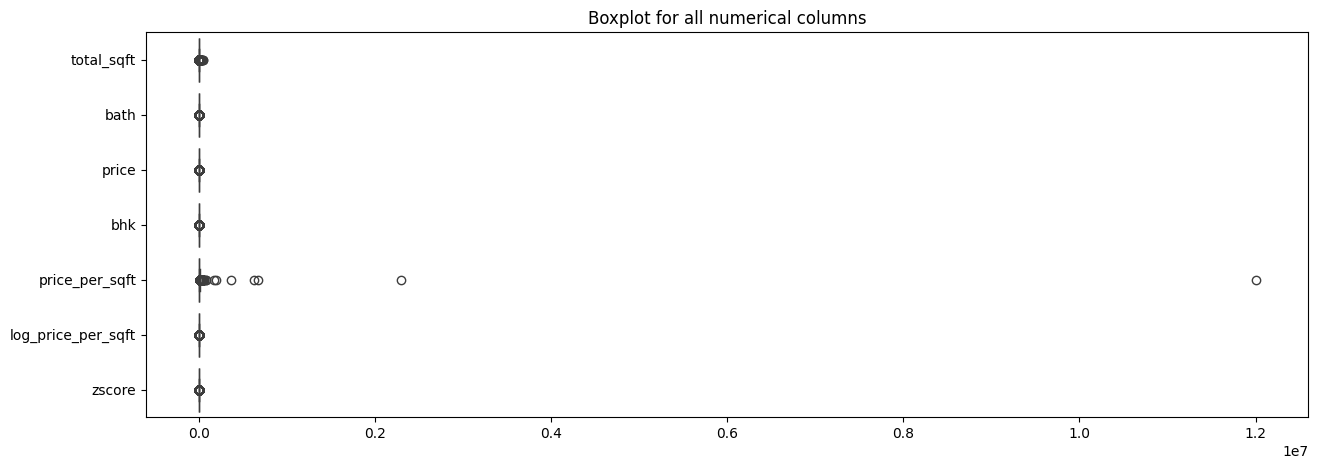

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot for all numerical columns')
plt.show()

### Histogram to check normality of price_per_sqft

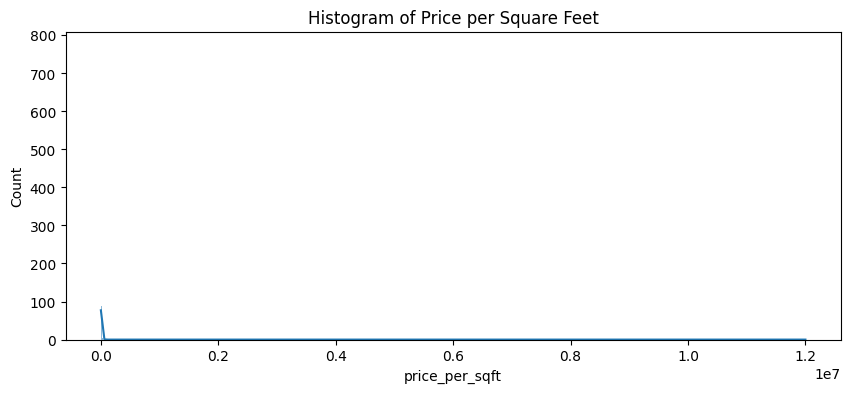

In [24]:
plt.figure(figsize=(10, 4))
sns.histplot(data['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Square Feet')
plt.show()

### Heatmap to check correlation

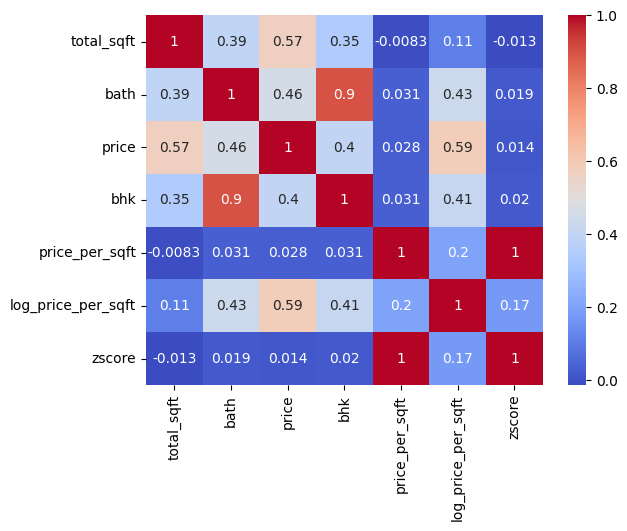

In [25]:
data_num = data.select_dtypes(include=[np.number])
corr = data_num.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

### Check the correlation between all numerical columns and plot heatmap

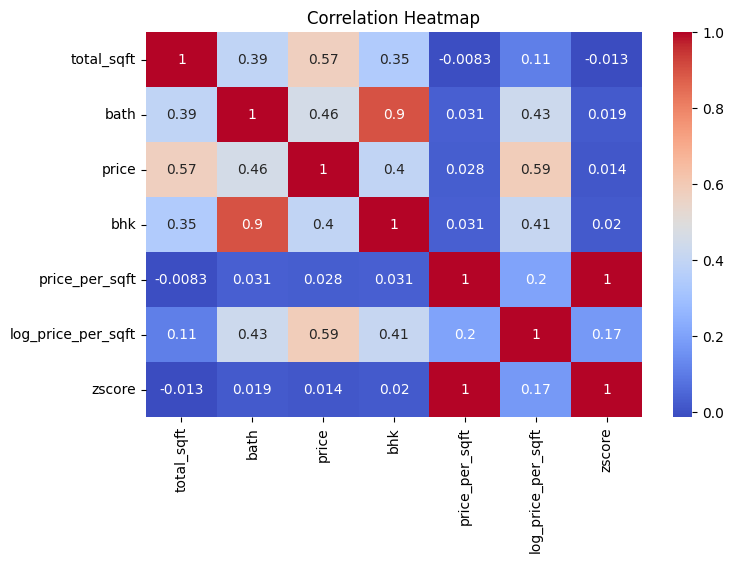

In [26]:
data_num = data.select_dtypes(include=[np.number])
correlation_matrix = data_num.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

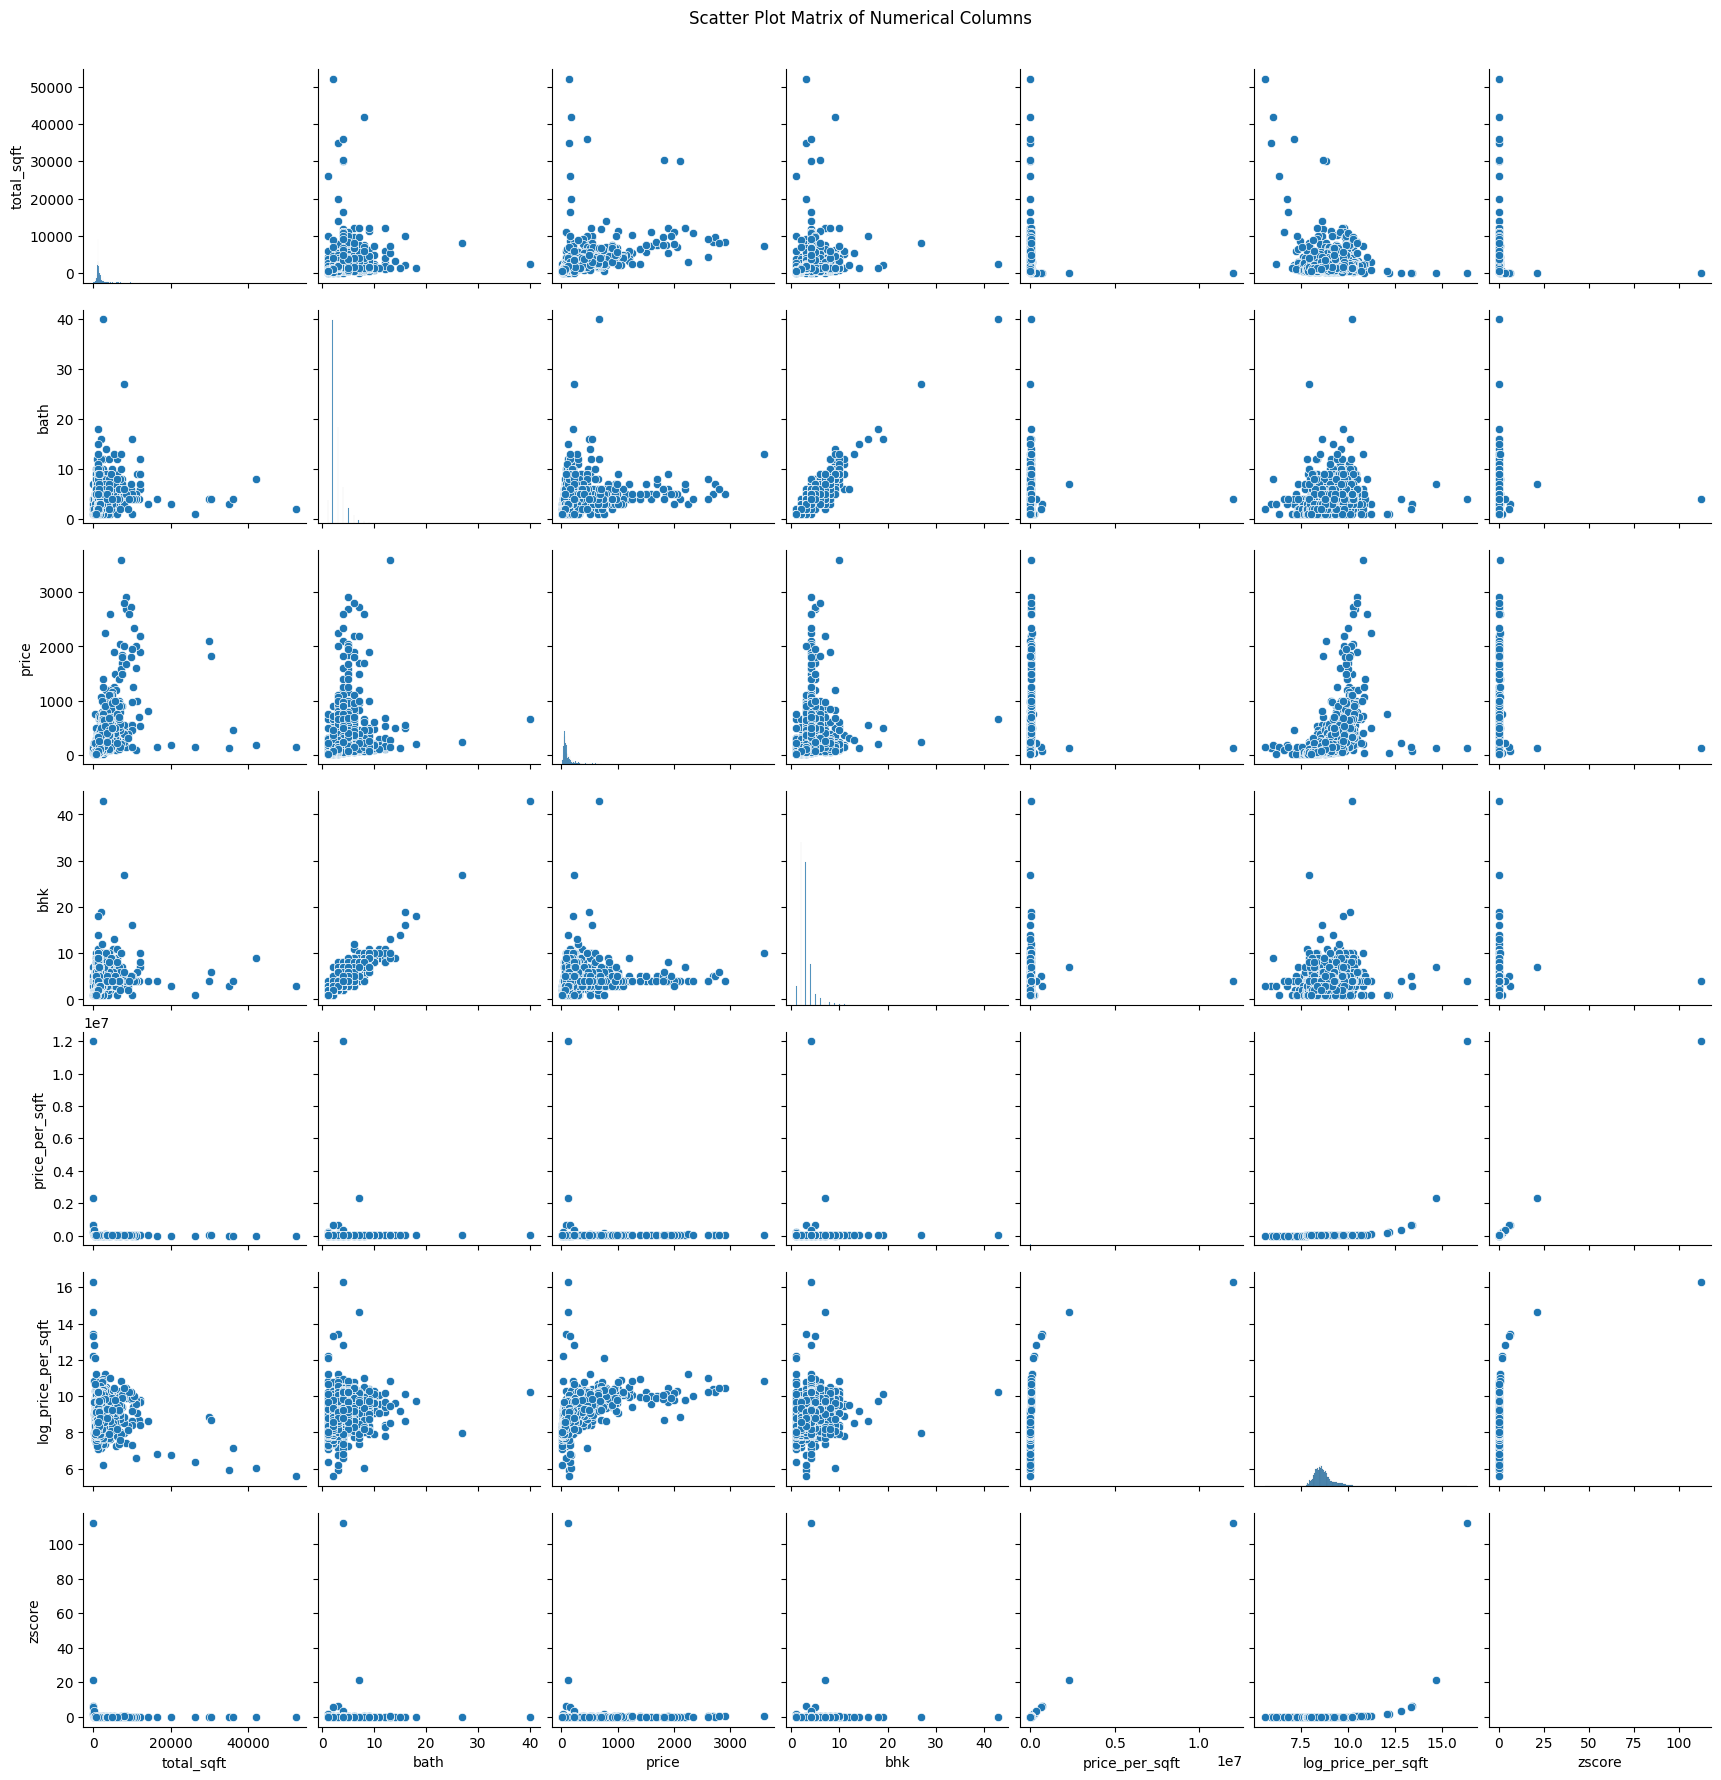

In [27]:
sns.pairplot(data.select_dtypes(include=[np.number]))
plt.suptitle('Scatter Plot Matrix of Numerical Columns', y=1.02)
plt.show()

In [28]:
print("Original Dataset Size:", data.shape)
print("Mean Filtered Dataset Size:", data_mean.shape)
print("Percentile Filtered Dataset Size:", data_outliers_removed.shape)
print("IQR Filtered Dataset Size:", data_iqr_removed.shape)
print("Normal Distribution Filtered Dataset Size:", data_normal_distribution.shape)
print("Z-Score Filtered Dataset Size:", data_zscore.shape)


Original Dataset Size: (13200, 9)
Mean Filtered Dataset Size: (13195, 7)
Percentile Filtered Dataset Size: (5939, 7)
IQR Filtered Dataset Size: (11935, 7)
Normal Distribution Filtered Dataset Size: (13195, 7)
Z-Score Filtered Dataset Size: (13195, 9)
